In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load csv 
url = 'https://raw.githubusercontent.com/kfern/jupyter/next/covid19-es-and/covid19-es-and.csv'
df = pd.read_csv(url)

In [3]:
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
last_fecha = df['Fecha'].max()

In [4]:
fFechas = pd.date_range(end=last_fecha, freq='7D', periods=4)
filtro = df['Fecha'].isin(fFechas)
dfV = df[filtro].copy()

In [5]:
dfV.set_index(['Provincia', 'Fecha'], inplace=True)
dfV.sort_index(level=['Provincia', 'Fecha'], inplace=True)

In [6]:
dfV.columns = ['Hospitalizadas', 'Curadas', 'Bajas']

In [7]:
dfG = dfV.groupby(level='Provincia').pct_change()*100
dfG.dropna(how='all', inplace=True)
dfG.tail()

Hospitalizadas    Curadas      Bajas
Provincia Fecha                                           
Sevilla   2020-04-28        6.992337  55.717256  11.162791
          2020-05-05        4.118174  40.587450   8.368201
Total     2020-04-21        9.002770  67.864173  21.650718
          2020-04-28        5.155201  47.727939  14.847591
          2020-05-05        3.279820  43.480849   8.476027

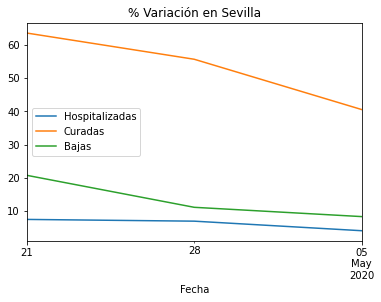

,Hospitalizadas,Curadas,Bajas
count,3.000000,3.000000,3.000000
mean,6.209511,53.303383,13.439169
std,1.830124,11.697311,6.514604
min,4.118174,40.587450,8.368201
25%,5.555255,48.152353,9.765496
50%,6.992337,55.717256,11.162791
75%,7.255180,59.661349,15.974654
max,7.518023,63.605442,20.786517


In [8]:
provincia = 'Sevilla'
dfG.loc[provincia].plot(title='% Variación en ' + provincia)
plt.show()
dfG.loc[provincia].describe()

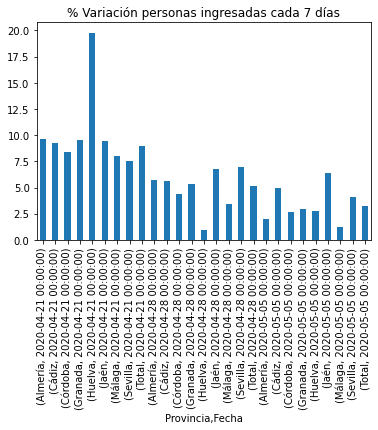

In [9]:
dfG.sort_index(level=['Fecha', 'Provincia'], inplace=True)
dfG['Hospitalizadas'].plot(kind='bar', title='% Variación personas ingresadas cada 7 días')
plt.show()

In [10]:
dfG.describe()

,Hospitalizadas,Curadas,Bajas
count,27.000000,27.000000,27.000000
mean,6.131461,53.999905,16.219091
std,3.818143,30.222084,9.820661
min,0.943396,11.904762,4.255319
25%,3.376791,34.875561,8.725193
50%,5.668016,46.901173,13.157895
75%,8.211202,67.265420,21.584853
max,19.774011,125.600000,42.666667


In [11]:
# Nuevos casos cada x días
dfN = dfV.diff()
first_fecha = fFechas.min()

# Se borra la primera fila ya que no tiene valores anteriores y su resultado no tiene sentido
dfN.drop(index=first_fecha, level='Fecha', inplace=True)
# Alternativa seleccionando las filas y borrando
#delete_rows = dfN.loc[(slice(None), [first_fecha]), :].index
#dfN.drop(delete_rows, inplace=True)

# Se borran las filas de Total
dfN.drop(index='Total', level='Provincia', inplace=True)

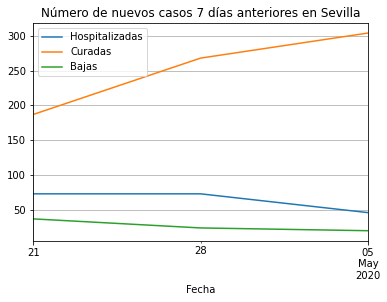

In [12]:
dfN.loc[provincia].plot(title='Número de nuevos casos 7 días anteriores en ' + provincia, grid=True)
plt.show()

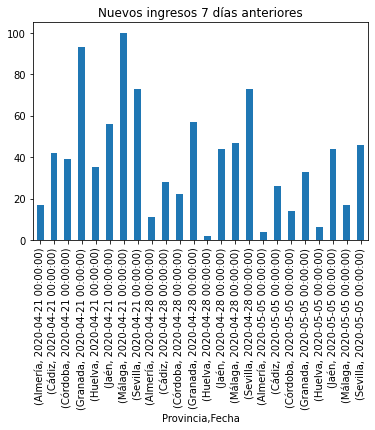

In [13]:
dfN.sort_index(level=['Fecha', 'Provincia'], inplace=True)
dfN['Hospitalizadas'].plot(kind='bar', title='Nuevos ingresos 7 días anteriores')
plt.show()

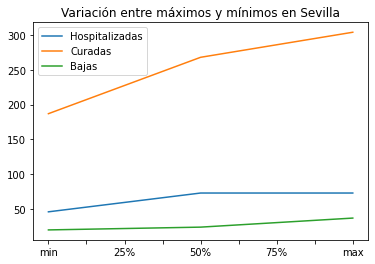

In [14]:
dfN.loc[provincia].describe().loc['min':'max'].plot(title='Variación entre máximos y mínimos en ' + provincia)
plt.show()

In [15]:
print('Nuevos casos en los 7 días anteriores')
print(dfN.sort_index())

Nuevos casos en los 7 días anteriores
                      Hospitalizadas  Curadas  Bajas
Provincia Fecha                                     
Almería   2020-04-21            17.0     64.0    5.0
          2020-04-28            11.0     85.0    4.0
          2020-05-05             4.0    104.0    2.0
Cádiz     2020-04-21            42.0     91.0   15.0
          2020-04-28            28.0     35.0   32.0
          2020-05-05            26.0     50.0   29.0
Córdoba   2020-04-21            39.0    172.0   21.0
          2020-04-28            22.0    358.0   17.0
          2020-05-05            14.0    225.0    6.0
Granada   2020-04-21            93.0    471.0   28.0
          2020-04-28            57.0    287.0   26.0
          2020-05-05            33.0    796.0   21.0
Huelva    2020-04-21            35.0     69.0    7.0
          2020-04-28             2.0     24.0    6.0
          2020-05-05             6.0     65.0    3.0
Jaén      2020-04-21            56.0     45.0   29.0
        

## Informe Cádiz últimos 10 días

In [16]:
provincia = 'Cádiz'
dias = 10
data = df.set_index(['Provincia', 'Fecha']).loc[provincia][['Ingresados', 'Altas', 'Bajas']].diff().tail(dias).copy()
data.columns = ['Hospitalizadas', 'Curadas', 'Bajas']
titulo = 'Nuevos casos en los últimos ' + str(dias) + ' días en ' + provincia
# Correcciones
# Al ser datos acumulados lo que indica es una corrección en el número de ingresados acumulados a ese día
# data.loc['2020-04-25']['Hospitalizadas'] = 0
data.loc['2020-04-30']['Hospitalizadas'] = 0
data.loc['2020-05-01']['Hospitalizadas'] = 0 # Aunque positiva parece relacionada con 25/04/2020

Nuevos casos en los últimos 10 días en Cádiz. (Nuevos ingresos hospitalarios)


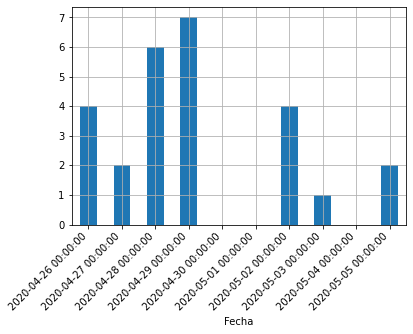

In [17]:
print(titulo + '. (Nuevos ingresos hospitalarios)')
data['Hospitalizadas'].plot(kind='bar', grid=True)
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light',
)
plt.show()

Nuevos casos en los últimos 10 días en Cádiz. (Variación entre mínimos y máximos)


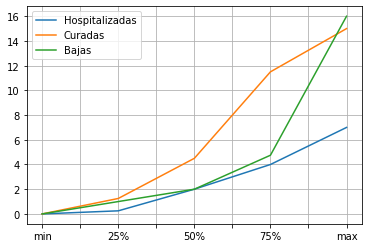

In [18]:
print(titulo + '. (Variación entre mínimos y máximos)')
data.describe().loc['min':'max'].plot(grid=True)
plt.show()

In [19]:
print(titulo)
print(data)

Nuevos casos en los últimos 10 días en Cádiz
            Hospitalizadas  Curadas  Bajas
Fecha                                     
2020-04-26             4.0      2.0    1.0
2020-04-27             2.0      0.0    1.0
2020-04-28             6.0     10.0    5.0
2020-04-29             7.0     15.0    4.0
2020-04-30             0.0      3.0    5.0
2020-05-01             0.0     13.0   16.0
2020-05-02             4.0     12.0    3.0
2020-05-03             1.0      0.0    0.0
2020-05-04             0.0      1.0    0.0
2020-05-05             2.0      6.0    1.0


In [20]:
data.describe()

,Hospitalizadas,Curadas,Bajas
count,10.00000,10.00000,10.000000
mean,2.60000,6.20000,3.600000
std,2.54733,5.80804,4.765618
min,0.00000,0.00000,0.000000
25%,0.25000,1.25000,1.000000
50%,2.00000,4.50000,2.000000
75%,4.00000,11.50000,4.750000
max,7.00000,15.00000,16.000000
